<a href="https://colab.research.google.com/github/ilman79/PelatihanBNSP/blob/main/Assesment_BNSP_Ilman_Gifari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Visual Python di Jupyter Notebook
# https://visualpython.ai/use-extension
!pip install jupyterlab-visualpython
!visualpy install

/bin/bash: line 1: visualpy: command not found


In [ ]:
# Loading Data Untuk Latihan
import warnings; warnings.simplefilter('ignore')
import pandas as pd
file_ = 'data/heart.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/arubhasy/dataset/main/heart.csv
    df = pd.read_csv(file_)

N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

baris =  918 , Kolom (jumlah variabel) =  12


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [ ]:
varObjects = df.select_dtypes(include = ['object'])
varObjects.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [ ]:
for col in varObjects.columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             911 non-null    float64 
 1   Sex             908 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    int64   
dtypes: category(5), float64(2), int64(5)
memory usage: 55.5 KB


# Penelaahan Data


Variabel "MaxHR", "RestingECG", dan "ExerciseAngina" keterangan di sumber data tidak sesuai pada logbook, Tetapi saat browsing di internet terdapat data yang sama dengan keterangan yang sesuai. Sehingga ketiga variabel tersebut tidak ada masalah.



#Check Noise

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,12.988393,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Terlihat bahwa pada variabel umur yaitu dengan umur 177 sehingga itu termasuk noise pada data

In [ ]:
catVar = df.select_dtypes(include = ['object', 'category'])

for col in catVar.columns:
    print(col,': ', set(df[col].unique()))

Sex :  {'M', nan, 'F'}
ChestPainType :  {'NAP', 'ATA', 'ASY', 'TA'}
RestingECG :  {'Normal', 'LVH', 'ST'}
ExerciseAngina :  {'N', 'Y'}
ST_Slope :  {'Flat', 'Up', 'Down'}


Tidak terdapat noise pada variabel object dan category.

#Check Noise Pada Variabel Numerik

In [ ]:
# import Module yang dibutuhkan untuk Visualisasi
import matplotlib.pyplot as plt, seaborn as sns
plt.style.use('bmh'); sns.color_palette("tab20"); sns.set()

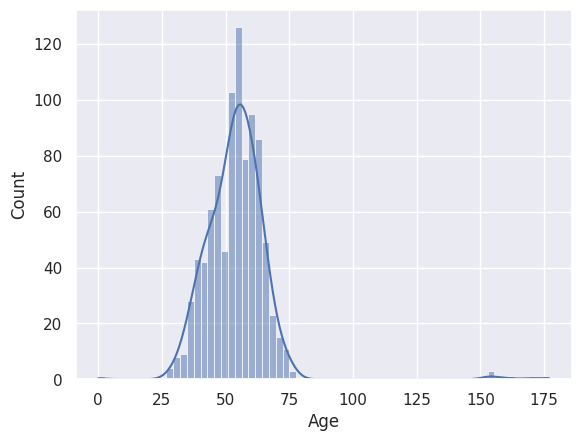

,Age
count,911.000000
mean,54.102086
std,12.988393
min,0.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,177.000000


In [ ]:
# Visual Python: Visualization > Seaborn
# distribusi pada var Umur
sns.histplot(data=df, x='Age', kde=True)
plt.show()
df[['Age']].describe()

Perlu dilakukan penanganan noise pada variabel Age, karena terdapat 0 kita asumsinya salah dalam menginputkan data sehingga kita jadikan nan dahulu

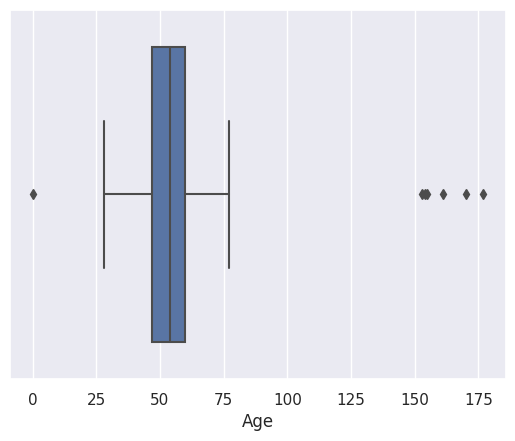

In [ ]:
# Visual Python: Visualization > Seaborn
# cek outlier pada variabel numerik penghasilan
p = sns.boxplot(x="Age", data=df)
plt.show()

Menghapus umur yang lebih dari 150 dan mengasumsikan umur 0 itu adalah missing value

In [ ]:
# jika outlier difilter
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

df = df.drop(df[df.Age > Q3+1.5*IQR].index)
df.shape

Q1=47.0, Q3=60.0, IQR=13.0


(912, 12)

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68.0,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57.0,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57.0,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
import numpy as np
df['Age'] = df['Age'].replace(to_replace="0.0", value=np.nan)

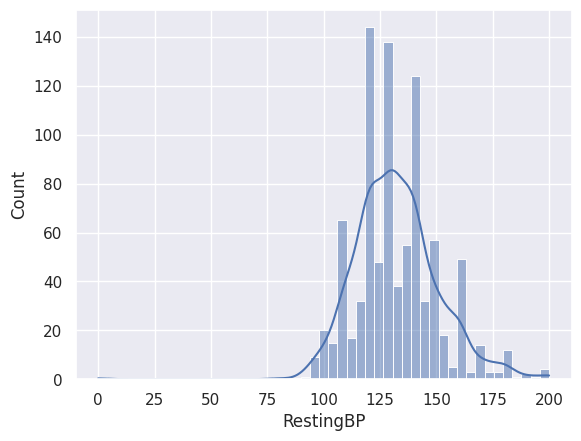

,RestingBP
count,912.000000
mean,132.339912
std,18.527300
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [ ]:
# Visual Python: Visualization > Seaborn
# distribusi pada var RestingBP
sns.histplot(data=df, x='RestingBP', kde=True)
plt.show()
df[['RestingBP']].describe()

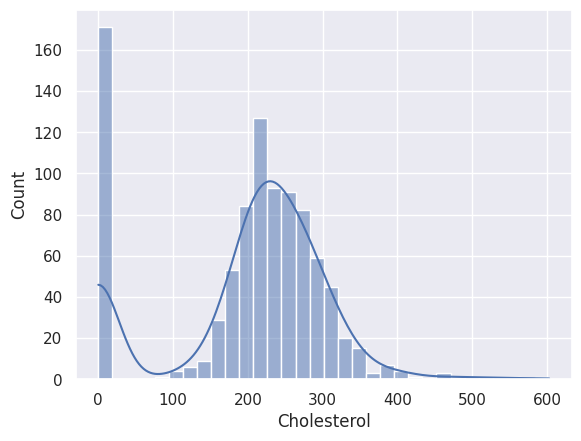

,Cholesterol
count,912.000000
mean,198.817982
std,109.481022
min,0.000000
25%,173.750000
50%,222.500000
75%,267.000000
max,603.000000


In [ ]:
# Visual Python: Visualization > Seaborn
# distribusi pada var Cholesterol
sns.histplot(data=df, x='Cholesterol', kde=True)
plt.show()
df[['Cholesterol']].describe()

Karena ada ada data yang value 0 maka kita asumsikan salah input maka dari itu dengan cara penanganannya diimputasikan dengan nilai rata-rata dan 600 kita asumsikan sesuai dengan data yang terjadi.

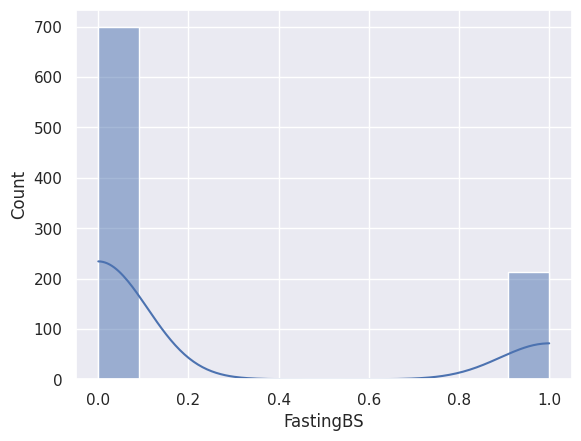

,FastingBS
count,912.000000
mean,0.233553
std,0.423323
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
# Visual Python: Visualization > Seaborn
# distribusi pada var Cholesterol
sns.histplot(data=df, x='FastingBS', kde=True)
plt.show()
df[['FastingBS']].describe()

In [ ]:
'''# Visual Python: Visualization > Seaborn
# distribusi pada var MaxHR
sns.histplot(data=df_baru, x='MaxHR', kde=True)
plt.show()
df_baru[['MaxHR']].describe()'''


"# Visual Python: Visualization > Seaborn\n# distribusi pada var MaxHR\nsns.histplot(data=df_baru, x='MaxHR', kde=True)\nplt.show()\ndf_baru[['MaxHR']].describe()"

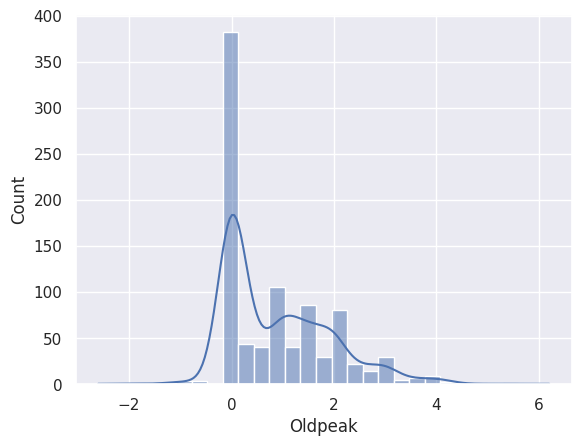

,Oldpeak
count,912.000000
mean,0.885855
std,1.067547
min,-2.600000
25%,0.000000
50%,0.550000
75%,1.500000
max,6.200000


In [ ]:
# Visual Python: Visualization > Seaborn
# distribusi pada var Oldpeak
sns.histplot(data=df, x='Oldpeak', kde=True)
plt.show()
df[['Oldpeak']].describe()

kita akan cek pada tahap outlier, apakah nilai -2,6 adalah outlier atau memang data nyatanya. dan pada grafik distibusinya tidak normal.

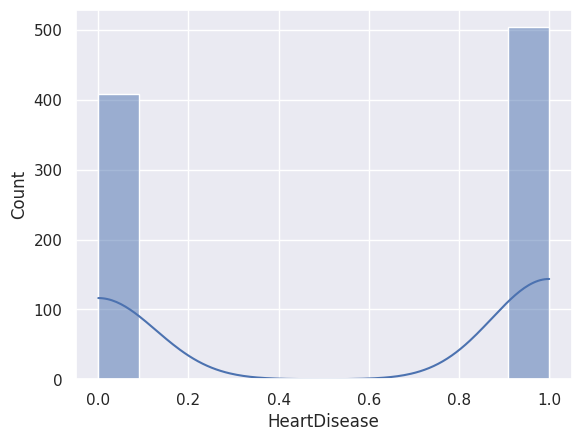

,HeartDisease
count,912.000000
mean,0.552632
std,0.497495
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
# Visual Python: Visualization > Seaborn
# distribusi pada var Oldpeak
sns.histplot(data=df, x='HeartDisease', kde=True)
plt.show()
df[['HeartDisease']].describe()

# Cek Duplikasi

In [ ]:
# mengecek apakah ada duplikat data sangatlah mudah menggunakan Pandas
print(df.shape)
print("jumlah data yang duplikat", df.duplicated().sum())
df[df.duplicated() == True]

(912, 12)
jumlah data yang duplikat 0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


## Melakukan penanganan pada duplikasi

In [ ]:
# menghapus entri yang memiliki data duplikat
df.drop_duplicates(keep="first", inplace=True)
print(df.duplicated().sum()) # no more duplicates
print(df.shape) # re-check by printing data size

0
(912, 12)


# Cek Outlier

In [ ]:
# Visual Python: Visualization > Seaborn
def vp_seaborn_show_values(axs, precision=1, space=0.01):
    pstr = '{:.' + str(precision) + 'f}'

    def _single(ax):
        # check orient
        orient = 'v'
        if len(ax.patches) == 1:
            # check if 0
            if ax.patches[0].get_x() == 0:
                orient = 'h'
        else:
            # compare 0, 1 patches
            p0 = ax.patches[0]
            p1 = ax.patches[1]
            if p0.get_x() == p1.get_x():
                orient = 'h'

        if orient == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*space)
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_height())
                    ax.text(_x, _y, value, ha='center')
        elif orient == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + (space - 0.01)
                _y = p.get_y() + p.get_height() / 2
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_width())
                    ax.text(_x, _y, value, ha='left')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

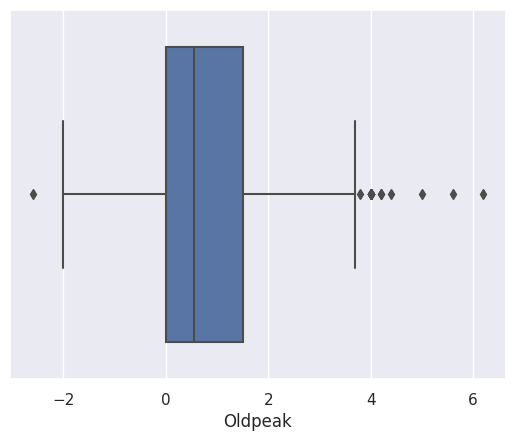

In [ ]:
# Visual Python: Visualization > Seaborn
import numpy as np
p = sns.boxplot(x="Oldpeak", data=df)
plt.show()

Kita asumsikan datanya adalah sebagai outlier dan penanganannya harus dihapuskan.

Q1=0.0, Q3=1.5, IQR=1.5


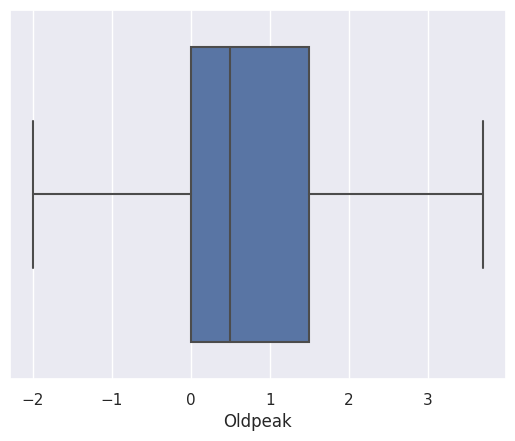

(896, 12)

In [ ]:
# jika outlier difilter
Q1 = df['Oldpeak'].quantile(0.25)
Q3 = df['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

df = df.drop(df[(df.Oldpeak < Q1-1.5*IQR) | (df.Oldpeak > Q3+1.5*IQR)].index)
p = sns.boxplot(x="Oldpeak", data=df)
plt.show()
df.shape

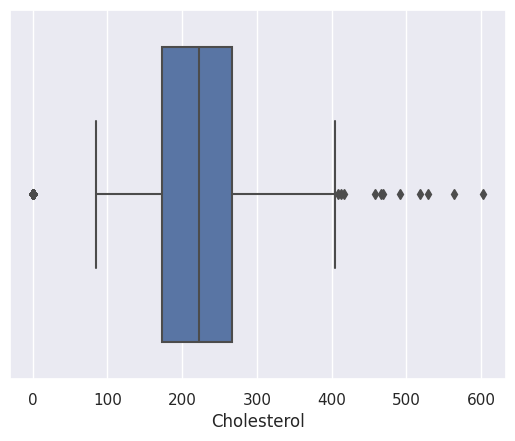

In [ ]:
# Visual Python: Visualization > Seaborn
import numpy as np
p = sns.boxplot(x="Cholesterol", data=df)
plt.show()

Melakukan penanangan terhadap outlier pada data Cholesterol yang mempunyai nilai 0, kita asumsikan NaN atau tidak ada yang diinput dan yang tidak normal di bersihkan

In [ ]:
df['Cholesterol'] = df['Cholesterol'].replace(to_replace=0.0, value=np.nan)

Q1=207.0, Q3=275.0, IQR=68.0


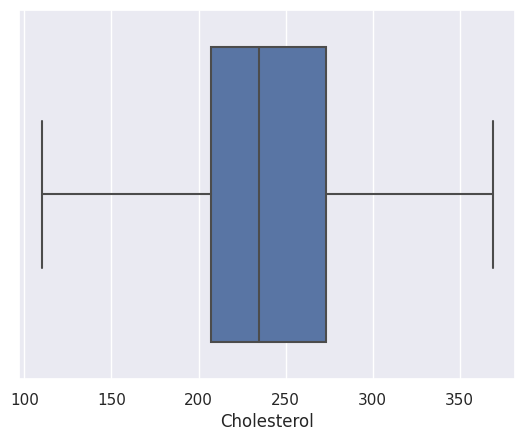

(874, 12)

In [ ]:
# jika outlier difilter
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

df = df.drop(df[(df.Cholesterol < Q1-1.5*IQR) | (df.Cholesterol > Q3+1.5*IQR)].index)
p = sns.boxplot(x="Cholesterol", data=df)
plt.show()
df.shape

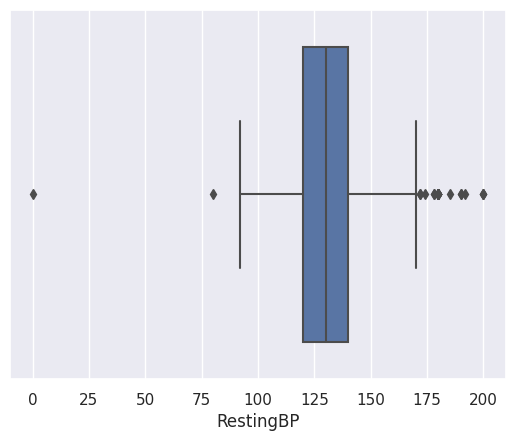

In [ ]:
# Visual Python: Visualization > Seaborn
import numpy as np
p = sns.boxplot(x="RestingBP", data=df)
plt.show()

Melakukan penanangan terhadap outlier pada data RestingBP yang mempunyai nilai 0, kita asumsikan NaN atau tidak ada yang diinput

In [ ]:
df['RestingBP'] = df['RestingBP'].replace(to_replace=0.0, value=np.nan)

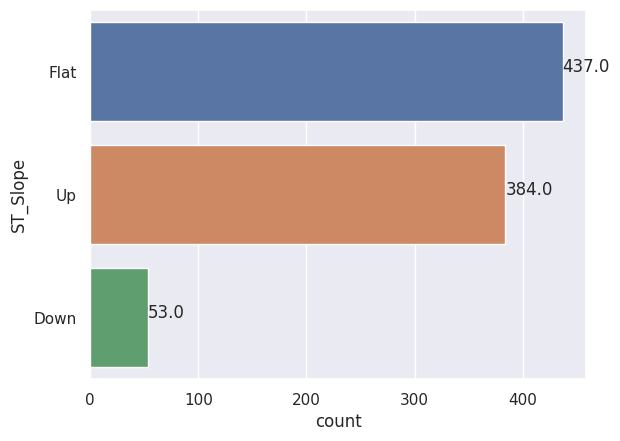

In [ ]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=df, y='ST_Slope', order=df['ST_Slope'].value_counts(ascending=False).index)
vp_seaborn_show_values(ax)
plt.show()

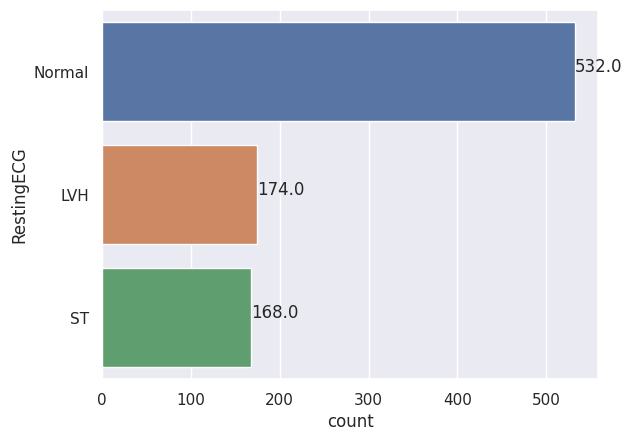

In [ ]:
# Visual Python: Visualization > Seaborn
ax = sns.countplot(data=df, y='RestingECG', order=df['RestingECG'].value_counts(ascending=False).index)
vp_seaborn_show_values(ax)
plt.show()

# Cek missing value

In [ ]:
# General Look at the Missing Values
print(df.isnull().sum())

Age                 6
Sex                10
ChestPainType       0
RestingBP           1
Cholesterol       170
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64


In [ ]:
# cek persentase missing tiap variabel
(df.isnull().sum()/len(df)*100).to_frame('persentase missing')

,persentase missing
Age,0.686499
Sex,1.144165
ChestPainType,0.000000
RestingBP,0.114416
Cholesterol,19.450801
FastingBS,0.000000
RestingECG,0.000000
MaxHR,0.000000
ExerciseAngina,0.000000
Oldpeak,0.000000


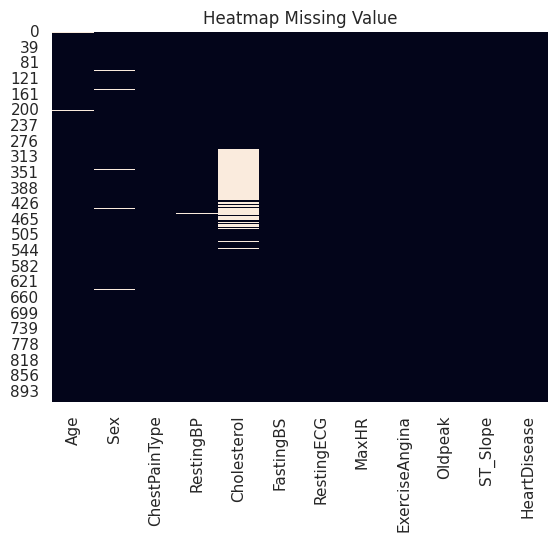

In [ ]:
# visualisasi missing value
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

Untuk penanganan missing value kita menggunakan penanangan untuk dihapuskan

In [ ]:
df["Cholesterol"].fillna(df["Cholesterol"].mean(), inplace = True)

In [ ]:
X = df.dropna()
print(df.shape, X.shape)
X.head()

(874, 12) (858, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49.0,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
5,39.0,M,NAP,120.0,339.0,0,Normal,170,N,0.0,Up,0


In [ ]:
print(X.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


#Tranformasi

####One-Hot-Encoding

In [ ]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49.0,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
5,39.0,M,NAP,120.0,339.0,0,Normal,170,N,0.0,Up,0


In [ ]:
print(X.shape)
for col in catVar.columns:
    if col != ['HeartDisease']:
        transformasi = pd.get_dummies(X[col], prefix='')
        X = pd.concat([X, transformasi], axis = 1)
        # Hapus Variabel Kategorik Awal, Sudah tidak diperlukan
        try:
            X.drop([col], axis=1, inplace=True)
        except Exception as err_:
            print(err_)
print(X.shape)
X.head()

(858, 12)
(858, 21)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,_F,_M,_ASY,...,_NAP,_TA,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
1,49.0,160.0,180.0,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37.0,130.0,283.0,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48.0,138.0,214.0,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54.0,150.0,195.0,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
5,39.0,120.0,339.0,0,170,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
X.to_csv("data/HeartDieses_PreProcessed.csv", encoding='utf8', index=False)

#Klasifikasi Model

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

In [ ]:
# Loading Data Preprocessed
file_ = 'data/HeartDieses_PreProcessed.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df_pre = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/ilman79/PelatihanBNSP/main/HeartDieses_PreProcessed.csv
    df_pre = pd.read_csv(file_)

N, P = df_pre.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df_pre.head()

baris =  858 , Kolom (jumlah variabel) =  21


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,_F,_M,_ASY,...,_NAP,_TA,_LVH,_Normal,_ST,_N,_Y,_Down,_Flat,_Up
0,49.0,160.0,180.0,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
1,37.0,130.0,283.0,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
2,48.0,138.0,214.0,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
3,54.0,150.0,195.0,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
4,39.0,120.0,339.0,0,170,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


#Train dan Test Data

In [ ]:
predictor = df_pre.loc[:, ~df_pre.columns.isin(['HeartDisease'])]
target = df_pre['HeartDisease']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.3, random_state=33) #fungsi rekursif; proses probabilistik untuk hasilnya bisa divalidasi
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(600, 20) (600,)
(258, 20) (258,)


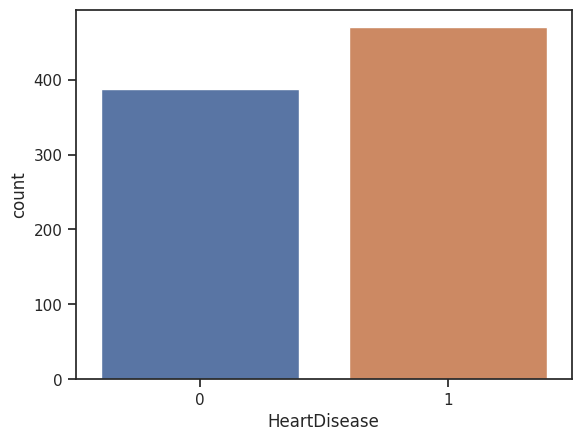

Counter({1: 470, 0: 388})
0 45.22144522144522 1 54.77855477855478 %


In [ ]:
# Visual Python: Visualization > Seaborn
from collections import Counter

sns.countplot(data=df_pre, x='HeartDisease')
plt.show()

D = Counter(df_pre['HeartDisease'])
print(D)
print("0", D[0]*100/(len(df_pre['HeartDisease'])), '1',D[1]*100/(len(df_pre['HeartDisease'])) ,'%')

#Model Regresi Logistik

In [ ]:
reglog = LogisticRegression().fit(xTrain, yTrain)
prediksi_regLog = reglog.predict(xTest)
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[ 87  16]
 [ 18 137]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       103
           1       0.90      0.88      0.89       155

    accuracy                           0.87       258
   macro avg       0.86      0.86      0.86       258
weighted avg       0.87      0.87      0.87       258



#Cross Validasi

In [ ]:
mulai = time.time()
scores_regLog = cross_val_score(reglog, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.84 (+/- 0.13), Waktu = 0.655 detik


Hasil dari cross validasi adalah 0.84 yaitu hasil dari membagi data train dan test secara berulang

RegLog    0.694118
dtype: float64

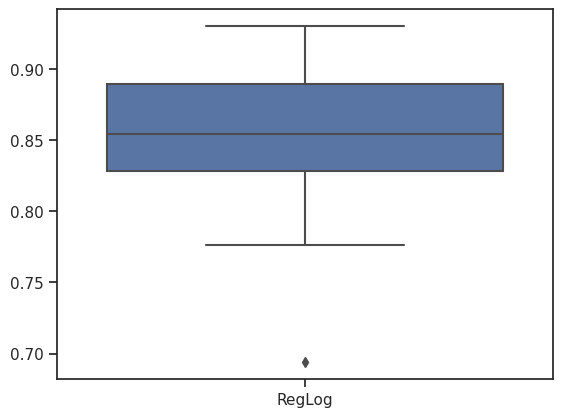

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog})
p = sns.boxplot(data = df_)
df_.min()

#Model Decision Tree

In [ ]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
DT = tree.DecisionTreeClassifier()
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT = DT.fit(xTrain, yTrain)
prediksi_DT = DT.predict(xTest)

print(confusion_matrix(yTest, prediksi_DT))
print(classification_report(yTest, prediksi_DT))

[[ 80  23]
 [ 32 123]]
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       103
           1       0.84      0.79      0.82       155

    accuracy                           0.79       258
   macro avg       0.78      0.79      0.78       258
weighted avg       0.79      0.79      0.79       258



In [ ]:
mulai = time.time()
scores_dt = cross_val_score(DT, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.77 (+/- 0.15), Waktu = 0.284 detik


RegLog     0.694118
DecTree    0.647059
dtype: float64

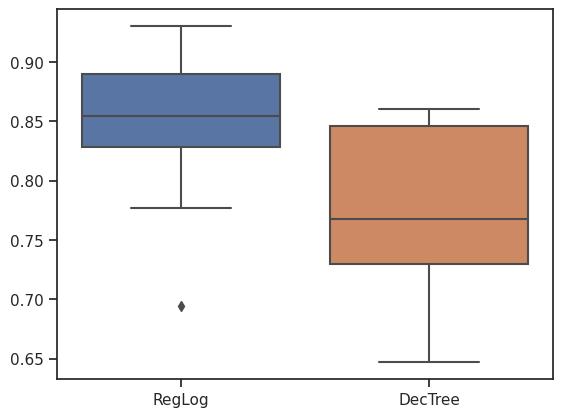

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog, "DecTree":scores_dt})
p = sns.boxplot(data = df_)
df_.min()

In [ ]:
# Atau secara programmatic
from sklearn.pipeline import make_pipeline
from sklearn import linear_model #import LogisticRegression

pipeSVM = make_pipeline(linear_model.LogisticRegression())
print(sorted(pipeSVM.get_params().keys()))

['logisticregression', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start', 'memory', 'steps', 'verbose']


In [ ]:
# Hyperparameter optimization pada model Regresi Logistik menggunakan gridCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'class_weight':[None, 'balanced']}]

grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_search.fit(xTrain, yTrain)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
0.8549999999999999
{'solver': 'newton-cg'}


In [ ]:
pipeDT = make_pipeline(tree.DecisionTreeClassifier())
print(sorted(pipeDT.get_params().keys()))

['decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter', 'memory', 'steps', 'verbose']


In [ ]:
# Optimal parameter Desion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree_model=DecisionTreeClassifier()
dtree_gscv = RandomizedSearchCV(dtree_model, param_grid, cv=10)
dtree_gscv.fit(xTrain, yTrain)

print(dtree_gscv.best_score_)
print(dtree_gscv.best_params_)

0.8266666666666665
{'max_depth': 3, 'criterion': 'gini'}


Dengan mengoptimalkan parameter sehingga didapat maksimal untuk percabangannya adalah 4 dan criterion adalah gini

#Model Selection

Accuracy RL: 0.85 (+/- 0.12)
Accuracy DT: 0.80 (+/- 0.14)


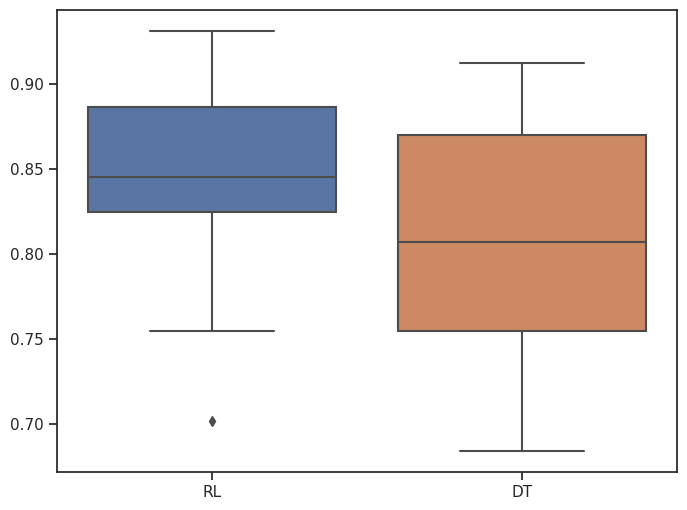

In [ ]:
kCV = 15 # Aslinya usahakan 10, idealnya 30 ... mengapa?
# Menggunakan parameter optimal
RL_opt = LogisticRegression(solver= 'newton-cg')
DT_opt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

# Melakukan Cross Validasi
models = ['RL', 'DT']
RL_score = cross_val_score(RL_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
DT_score = cross_val_score(DT_opt, predictor, target, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=0)
scores = [RL_score, DT_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p = sns.boxplot(data=pd.DataFrame(data), ax=ax)